In [17]:
# import all required library
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
data = pd.read_csv("https://raw.githubusercontent.com/madhurendra1/machine-learning/main/50_Startups.csv")  # data read

In [19]:
data.columns     # columns of dataset

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [20]:
data.shape

(50, 5)

In [21]:
data.head()  # top 5 rows

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [22]:
data.describe()  # data description

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [23]:
data.info()   # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [24]:
data.isnull().sum()             # check null value
# conclusion: No null value present in the dataset

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


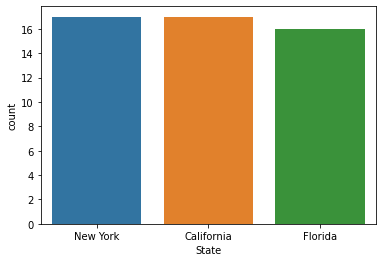

In [25]:
sns.countplot(data['State'])     # number of people present in each state

### LabelEncoding of State column

In [26]:
label_encoder = LabelEncoder()
data['State'] = label_encoder.fit_transform(data['State'])

# after label encoding of state column
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


### Splitting dataset into train and test set

In [27]:
# dependentVariable: "Profit"
dependentVariable = "Profit"

X = data.drop([dependentVariable], axis=1)
y = data[dependentVariable]

# splitting the dataset into train(80%) and test(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LinearRegression

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)        # Train the model

LinearRegression()

In [29]:
# prediction of X_test data
model.predict(X_test)

array([126720.66150723,  84909.08961912,  98890.31854876,  46479.31240248,
       129113.18318813,  50968.88397762, 109015.01626803, 100893.57078084,
        97713.73821431, 113085.59056068])

### Mean squared error

In [30]:
print("Mean squared error for test data: ", mean_squared_error(y_test, model.predict(X_test)))
print("Mean squared error for train data: ", mean_squared_error(y_train, model.predict(X_train)))
print("Mean squared error for all data: ", mean_squared_error(y, model.predict(X)))

Mean squared error for test data:  80929465.49097767
Mean squared error for train data:  79887908.05239344
Mean squared error for all data:  80096219.54011029


### Root mean squared error

In [31]:
print("Root Mean squared error for test data: ", sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("Root Mean squared error for train data: ", sqrt(mean_squared_error(y_train, model.predict(X_train))))
print("Root Mean squared error for all data: ", sqrt(mean_squared_error(y, model.predict(X))))

Root Mean squared error for test data:  8996.080562721616
Root Mean squared error for train data:  8938.003583149508
Root Mean squared error for all data:  8949.649129441348


### Rsquared

In [32]:
print("Score for test data: ", model.score(X_test, y_test))
print("Score for train data: ", model.score(X_train, y_train))
print("Score for all data: ", model.score(X, y))

Score for test data:  0.9000614254946404
Score for train data:  0.9535928780839646
Score for all data:  0.9496913509509272
